# 1. Importação de Bibliotecas

In [2]:
import warnings
import pandas as pd
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm, probplot, pearsonr, power_divergence
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.express as px

# 2. Carregamento de Dados

In [421]:
dados_cr7 = pd.read_csv('cr7.csv')
dados_messi = pd.read_csv('messi.csv')
data = pd.read_csv('data.csv')

# 3. Familiarização com as Tabelas

In [ ]:
print('CR7:')
display(dados_cr7.head(5))
print('\nMessi:')
display(dados_messi.head(5))
print('\nMessi e CR7:')
display(data.head(5))

# 4. Regularização de tabelas

## 4.1 Messi

### 4.1.1 Competição


In [ ]:
display(dados_messi['Competition'].drop_duplicates())
print()
display(dados_messi[dados_messi['Competition'] == 'Champions League'])
print()
display(dados_messi[dados_messi['Competition'] == 'Troph�e des Champions'])
print()
display(dados_messi[dados_messi['Competition'] == 'Trophée des Champions'])
print()
dados_messi['Competition'][690] = 'UEFA Champions League'
dados_messi.drop(686,inplace=True)
print()
display(dados_messi[dados_messi['Competition'] == 'Champions League'])
print()
display(dados_messi[dados_messi['Competition'] == 'Troph�e des Champions'])
print()
display(dados_messi[dados_messi['Competition'] == 'Trophée des Champions'])
print()

### 4.1.2 Result

In [ ]:
print(dados_messi[dados_messi['Venue'] == 'A']['Result'])

for i in dados_messi[dados_messi['Venue'] == 'A']['Result'].index:
    result = dados_messi['Result'][i].split(':')
    try:
        dados_messi['Result'][i] = f'{int(result[1])}:{int(result[0])}'
    except:
        result1 = result[1].split(' ')
        dados_messi['Result'][i] = f'{result1[0]}:{result[0]} {result1[1]}'
print(dados_messi[dados_messi['Venue'] == 'A']['Result'])

### 4.1.3 At_score

In [ ]:
for i in dados_messi[dados_messi['Venue'] == 'A']['At_score'].index:
    At_score = dados_messi['At_score'][i].split(':')
    try:
        dados_messi['At_score'][i] = f'{int(At_score[1])}:{int(At_score[0])}'
    except:
        dados_messi['At_score'][i] = f'{At_score[1]}:{At_score[0]}'

### 4.1.4 Season

In [ ]:
for i in dados_messi[dados_messi['Season'] == '11-Dec'].index:
    dados_messi['Season'][i] = '11/12'

for i in dados_messi[dados_messi['Season'] == 'Dec-13'].index:
    dados_messi['Season'][i] = '12/13'

### 4.1.5 Position

In [ ]:

print(dados_messi['Playing_Position'].drop_duplicates())

t = dados_messi['Playing_Position'][0]
u = dados_messi['Playing_Position'][308]
for i in dados_messi[dados_messi['Playing_Position'] == u ].index:
     dados_messi['Playing_Position'][i] = t

t = dados_messi['Playing_Position'][1]
u = dados_messi['Playing_Position'][377]
for i in dados_messi[dados_messi['Playing_Position'] == u ].index:
     dados_messi['Playing_Position'][i] = t

t = dados_messi['Playing_Position'][204]
u = dados_messi['Playing_Position'][522]
for i in dados_messi[dados_messi['Playing_Position'] == u ].index:
     dados_messi['Playing_Position'][i] = t

t = dados_messi['Playing_Position'][374]
u = dados_messi['Playing_Position'][416]
for i in dados_messi[dados_messi['Playing_Position'] == u ].index:
     dados_messi['Playing_Position'][i] = t


print(dados_messi['Playing_Position'].drop_duplicates())


# 5. Criação de novas tabelas

## 5.1 Gols por Jogo que marcou

In [374]:
gols_competition_per_season_per_matchday = dados_messi.groupby(by = ['Season','Competition', 'Matchday']).Opponent
lista_dados = []
for i in gols_competition_per_season_per_matchday:
    lista_dados.append([i[0][0],i[0][1],i[0][2],len(i[1])])

gols_competition_per_season_per_matchday = pd.DataFrame(lista_dados)
gols_competition_per_season_per_matchday.columns = [['Season', 'Competition', 'Matchday','Gols']]
display(gols_competition_per_season_per_matchday)

,Season,Competition,Matchday,Gols
0,04/05,LaLiga,34,1
1,05/06,Copa del Rey,Quarter-Finals,1
2,05/06,LaLiga,13,1
3,05/06,LaLiga,19,1
4,05/06,LaLiga,20,1
...,...,...,...,...
401,Dec-13,LaLiga,9,2
402,Dec-13,Supercopa,final,2
403,Dec-13,UEFA Champions League,Group Stage,5
404,Dec-13,UEFA Champions League,Quarter-Finals,1


## 5.2 Gols por Competição na Temporada

In [375]:
gols_competition_per_season = dados_messi.groupby(by = ['Season','Competition']).Matchday
lista_dados = []
for i in gols_competition_per_season:
    lista_dados.append([i[0][0],i[0][1],len(i[1])])

gols_competition_per_season = pd.DataFrame(lista_dados)
gols_competition_per_season.columns = [['Season', 'Competitition', 'Gols']]
display(gols_competition_per_season)


,Season,Competitition,Gols
0,04/05,LaLiga,1
1,05/06,Copa del Rey,1
2,05/06,LaLiga,6
3,05/06,UEFA Champions League,1
4,06/07,Copa del Rey,2
...,...,...,...
63,22/23,UEFA Champions League,3
64,Dec-13,Copa del Rey,4
65,Dec-13,LaLiga,46
66,Dec-13,Supercopa,2


## 5.3 Gols por Temporada

In [ ]:
per_season = pd.DataFrame(dados_messi.groupby('Season').Opponent)
per_season['Gols'] = len(per_season[1][0])

for i in range(len(per_season[0])):
    per_season['Gols'][i] = len(per_season[1][i])


per_season = per_season.rename(columns = {0: 'Season', 1: 'Opponents'}).sort_values(by='Season')
per_season = per_season.drop(['Opponents'], axis=1)

display(per_season)

## 5.4 Gols por Competição

In [ ]:
per_competition = pd.DataFrame(dados_messi.groupby('Competition').Opponent)
per_competition['Gols'] = len(per_competition[1][0])

for i in range(len(per_competition[0])):
    per_competition['Gols'][i] = len(per_competition[1][i])

per_competition.rename(columns = {0: 'Competition', 1: 'Opponents'}, inplace=True)
per_competition.sort_values(by='Gols',ascending= False, inplace=True)
per_competition.drop(['Opponents'], axis=1, inplace = True)

display(per_competition)

## 5.5 Gols por Tipo

In [ ]:
per_type = pd.DataFrame(dados_messi.groupby('Type').Opponent)
per_type['Gols'] = len(per_type[1][0])

for i in range(len(per_type[0])):
    per_type['Gols'][i] = len(per_type[1][i])

per_type = per_type.rename(columns = {0: 'Type', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_type = per_type.drop(['Opponents'], axis=1)

display(per_type)

## 5.6 Gols por Adversário

In [ ]:
per_opponent = pd.DataFrame(dados_messi.groupby('Opponent').Season)
per_opponent['Gols'] = len(per_opponent[1][0])

for i in range(len(per_opponent[0])):
    per_opponent['Gols'][i] = len(per_opponent[1][i])

per_opponent = per_opponent.rename(columns = {0: 'Opponent', 1: 'Seasons'}).sort_values(by='Gols',ascending= False)
per_opponent = per_opponent.drop(['Seasons'], axis=1)

display(per_opponent)


## 5.7 Gols por posição

In [ ]:
per_position = pd.DataFrame(dados_messi.groupby('Playing_Position').Opponent)
per_position['Gols'] = len(per_position[1][0])

for i in range(len(per_position[0])):
    per_position['Gols'][i] = len(per_position[1][i])

per_position = per_position.rename(columns = {0: 'Position', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_position = per_position.drop(['Opponents'], axis=1)

display(per_position)

## 5.8 Gols por jogador assistente

In [ ]:
per_assist = pd.DataFrame(dados_messi.groupby('Goal_assist').Opponent)
per_assist['Gols'] = len(per_assist[1][0])

for i in range(len(per_assist[0])):
    per_assist['Gols'][i] = len(per_assist[1][i])

per_assist = per_assist.rename(columns = {0: 'Assist', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_assist = per_assist.drop(['Opponents'], axis=1)

display(per_assist)

## 5.9 Gols por Clube

In [ ]:
per_club = pd.DataFrame(dados_messi.groupby('Club').Opponent)
per_club['Gols'] = len(per_club[1][0])

for i in range(len(per_club[0])):
    per_club['Gols'][i] = len(per_club[1][i])

per_club = per_club.rename(columns = {0: 'Club', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_club = per_club.drop(['Opponents'], axis=1)

display(per_club)

## 5.10 Gols por resultado final do jogo

In [ ]:
per_final_result = pd.DataFrame(dados_messi.groupby('Result').Opponent)
per_final_result['Gols'] = len(per_final_result[1][0])

for i in range(len(per_final_result[0])):
    per_final_result['Gols'][i] = len(per_final_result[1][i])

per_final_result = per_final_result.rename(columns = {0: 'Result', 1: 'Opponents'}).sort_values(by='Result',ascending= True)
per_final_result = per_final_result.drop(['Opponents'], axis=1)

display(per_final_result)

## 5.11 Gols por Placar no Momento

In [ ]:
per_score_moment = pd.DataFrame(dados_messi.groupby('At_score').Opponent)
per_score_moment['Gols'] = len(per_score_moment[1][0])

for i in range(len(per_score_moment[0])):
    per_score_moment['Gols'][i] = len(per_score_moment[1][i])

per_score_moment = per_score_moment.rename(columns = {0: 'At_score', 1: 'Opponents'}).sort_values(by='At_score',ascending= True)
per_score_moment = per_score_moment.drop(['Opponents'], axis=1)

display(per_score_moment)

## 5.12 Gols por Local (H = Home; A = Away)

In [ ]:

per_venue = pd.DataFrame(dados_messi.groupby('Venue').Opponent)
per_venue['Gols'] = len(per_venue[1][0])

for i in range(len(per_venue[0])):
    per_venue['Gols'][i] = len(per_venue[1][i])
    
per_venue = per_venue.rename(columns = {0: 'Venue', 1: 'Opponents'}).sort_values(by='Gols',ascending= False)
per_venue = per_venue.drop(['Opponents'], axis=1)   

display(per_venue)

# 6 Histogramas

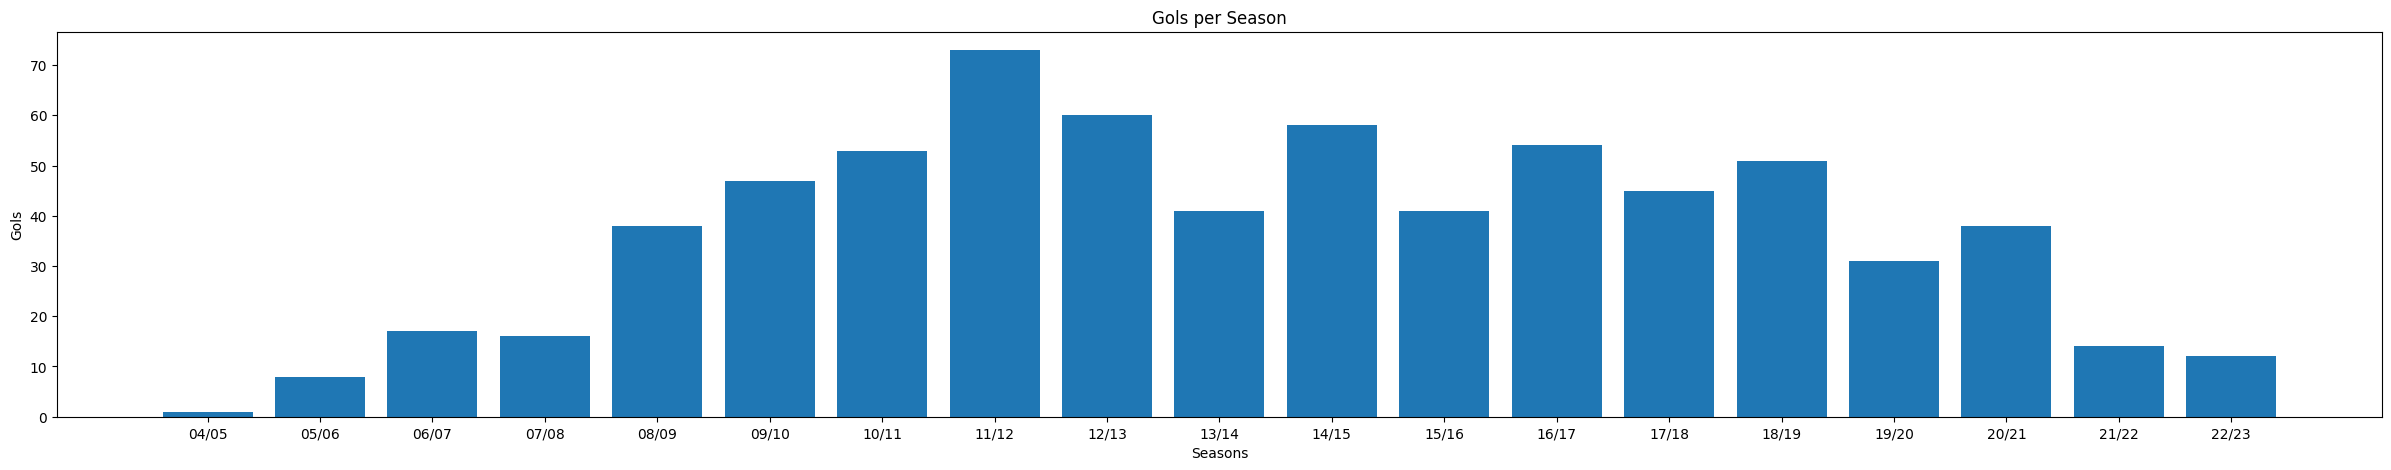

In [237]:
#ordem Cronológica
x = per_season['Season'].to_numpy()
y = per_season['Gols'].to_numpy()
plt.figure(figsize = (30,5))
plt.title('Gols per Season')
plt.xlabel('Seasons')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


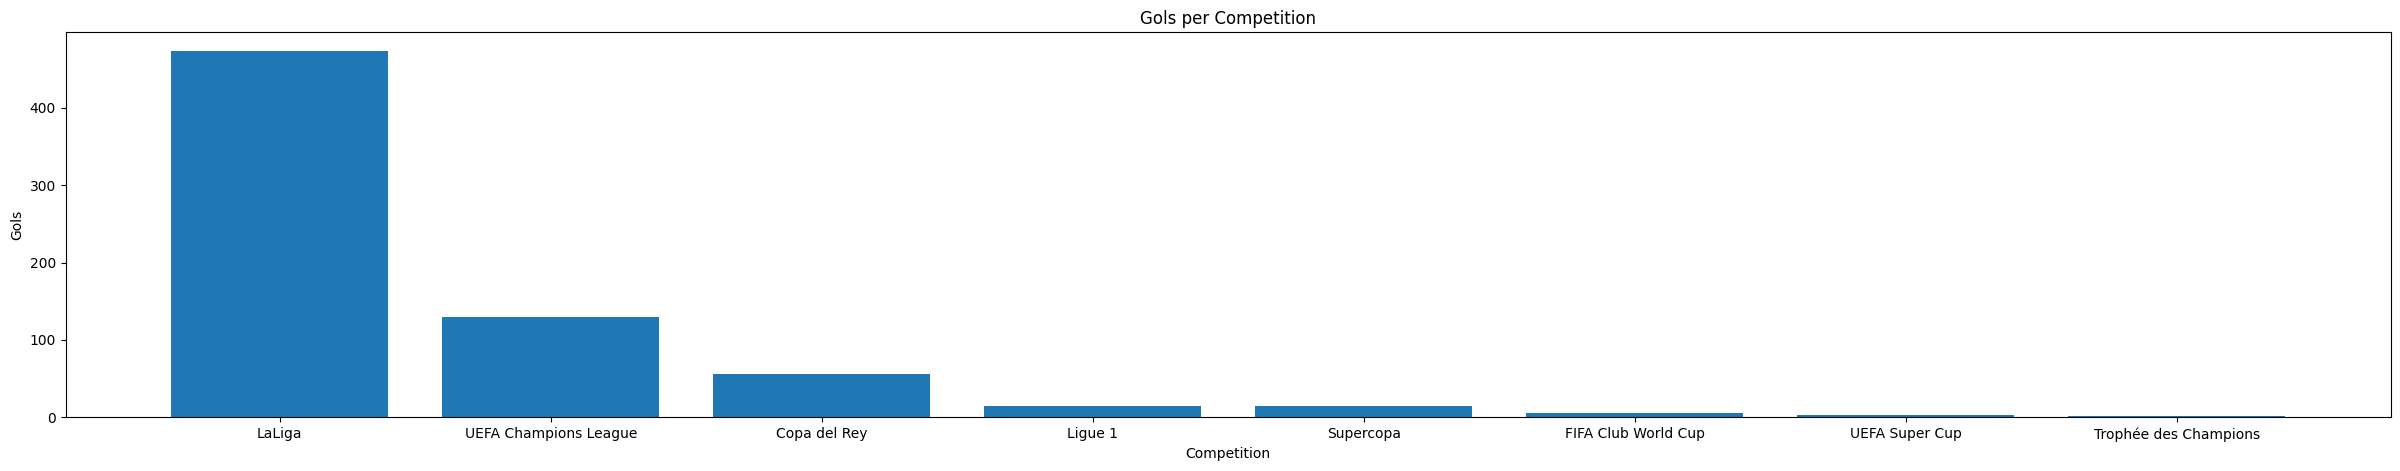

In [238]:
#ordem Cronológica
x = per_competition['Competition'].to_numpy()
y = per_competition['Gols'].to_numpy()
plt.figure(figsize = (30,5))
plt.title('Gols per Competition')
plt.xlabel('Competition')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


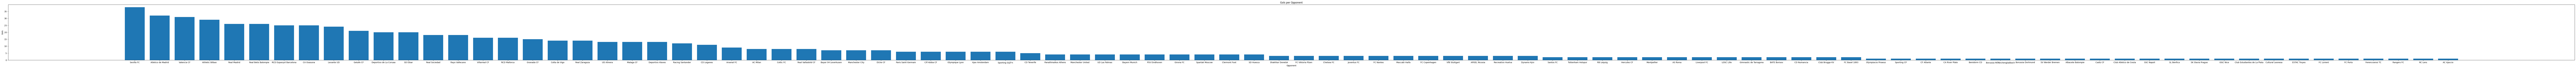

In [239]:
#ordem Cronológica
x = per_opponent['Opponent'].to_numpy()
y = per_opponent['Gols'].to_numpy()
plt.figure(figsize = (230,5))
plt.title('Gols per Opponent')
plt.xlabel('Opponent')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


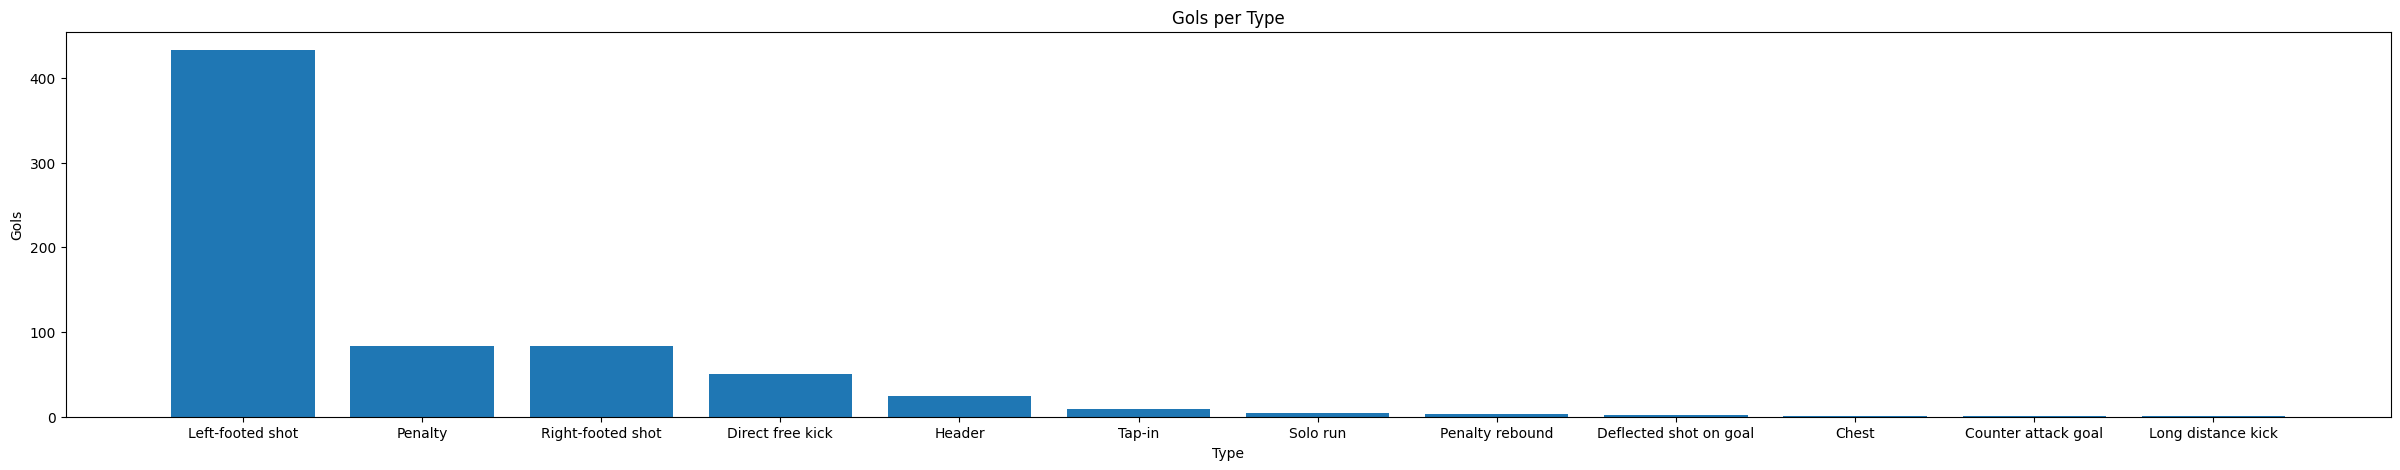

In [240]:
#ordem Cronológica
x = per_type['Type'].to_numpy()
y = per_type['Gols'].to_numpy()
plt.figure(figsize = (30,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


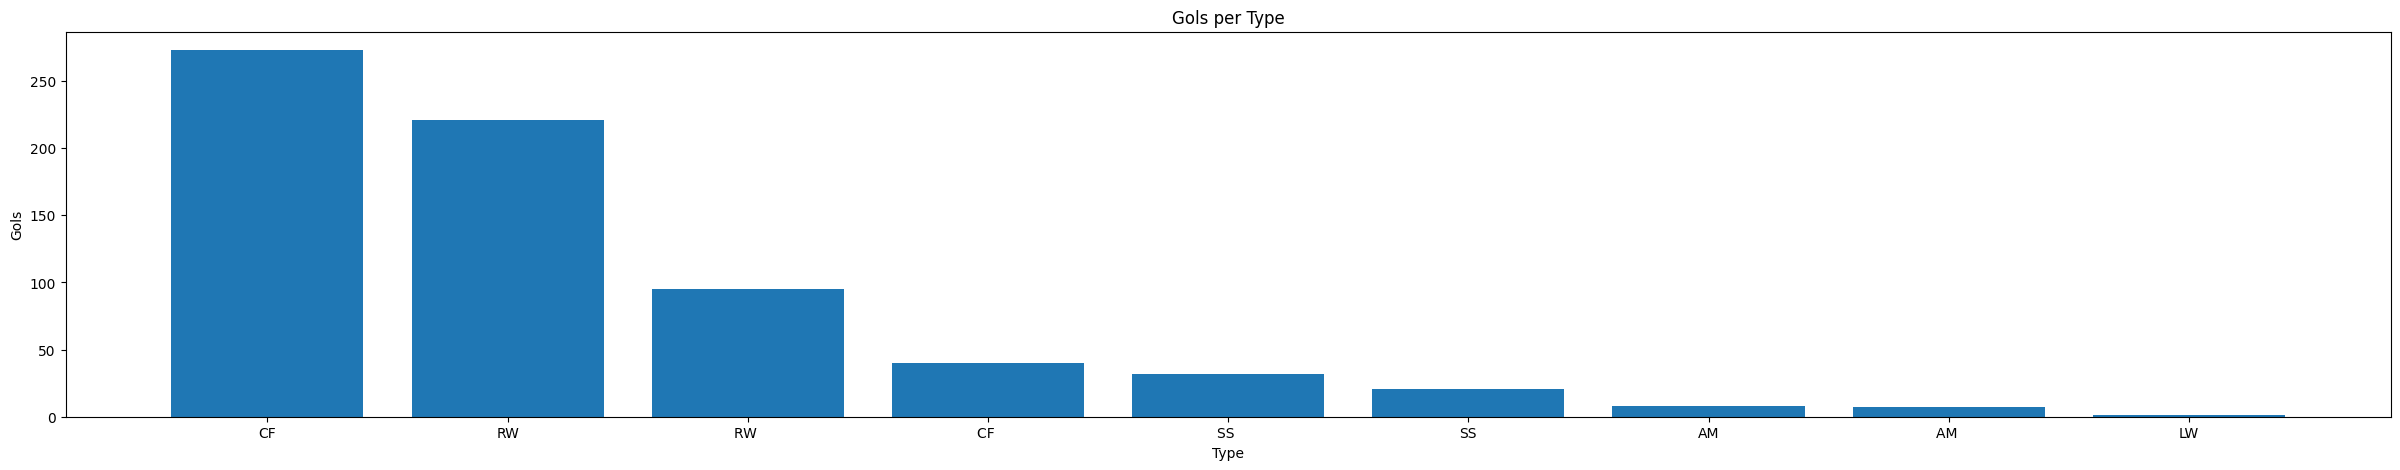

In [241]:
#ordem Cronológica
x = per_position['Position']
y = per_position['Gols']
plt.figure(figsize = (30,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


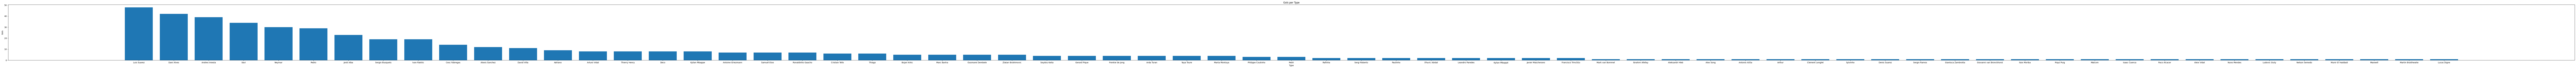

In [242]:
#ordem Cronológica
x = per_assist['Assist']
y = per_assist['Gols']
plt.figure(figsize = (230,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


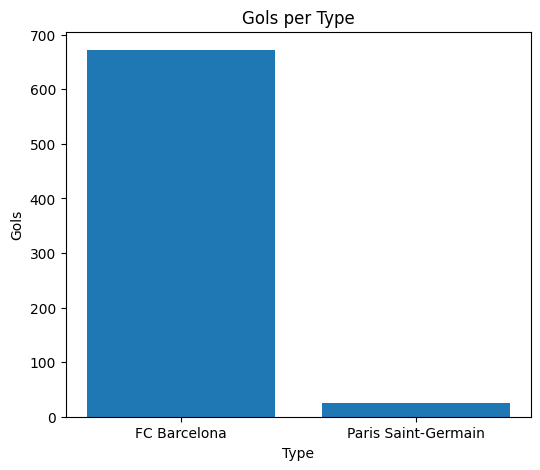

In [243]:
#ordem Cronológica
x = per_club['Club']
y = per_club['Gols']
plt.figure(figsize = (6,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


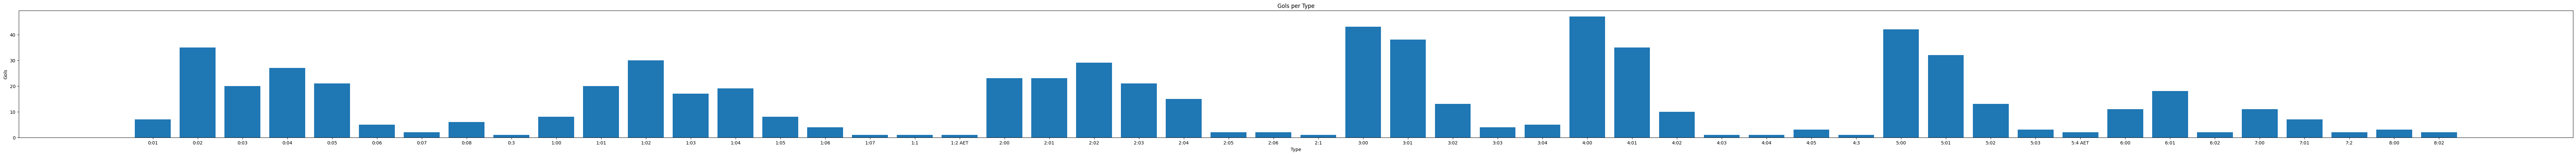

In [244]:
#ordem Cronológica
x = per_final_result['Result']
y = per_final_result['Gols']
plt.figure(figsize = (100,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


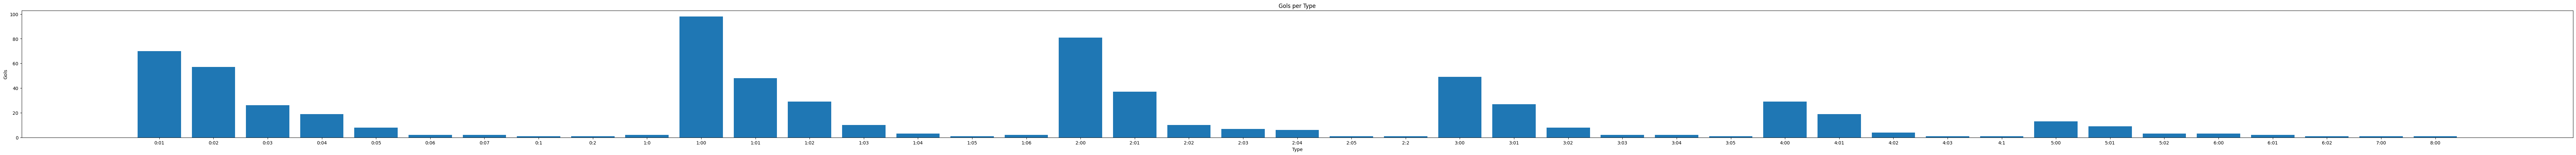

In [245]:
#ordem Cronológica
x = per_score_moment['At_score']
y = per_score_moment['Gols']
plt.figure(figsize = (100,5))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()


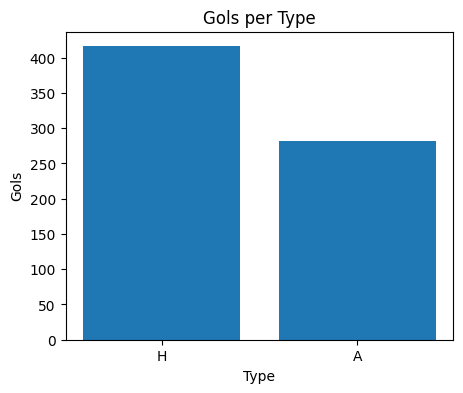

In [249]:
#ordem Cronológica
x = per_venue['Venue']
y = per_venue['Gols']
plt.figure(figsize = (5,4))
plt.title('Gols per Type')
plt.xlabel('Type')
plt.ylabel('Gols')
plt.bar(x, y)
plt.show()
